## Fitness & Lifestyle Prediction Model

In today’s world, maintaining a healthy lifestyle is crucial for overall
well-being. Your task is to build a machine learning model that predicts
whether an individual is healthy or not based on the different physical
and lifestyle attributes.

You are provided with a dataset containing 6,000 entries of individuals,
each with attributes like physical fitness level, diet preferences, activity
level, sleep habits, mindfulness, and career. The goal is to train a model
that accurately predicts the is_healthy label (1 for healthy, 0
otherwise).

Can your model differentiate between healthy and unhealthy person
correctly? Let’s find out!
You can use ML algorithms like SVM, Random Forest, etc.


## Load up .csv

In [1]:
import pandas as pd

# Load the dataset
file_path = "./innovize_final_ml.csv"
df = pd.read_csv(file_path)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phy_fitness         5997 non-null   float64
 1   diet_pref           5996 non-null   object 
 2   act_level           5994 non-null   object 
 3   sleep_hrs           6000 non-null   int64  
 4   mindfulness         6000 non-null   int64  
 5   career              5996 non-null   object 
 6   gender              5999 non-null   float64
 7   daily_avg_steps     5989 non-null   float64
 8   daily_avg_calories  5986 non-null   float64
 9   is_healthy          6000 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 468.9+ KB


,phy_fitness,diet_pref,act_level,sleep_hrs,mindfulness,career,gender,daily_avg_steps,daily_avg_calories,is_healthy
0,3.0,Vegan,Sedentary,7,10,Artist,1.0,2020.0,1831.0,0
1,4.0,Vegan,Lightly Active,7,1,Teacher,0.0,5154.0,2190.0,0
2,8.0,Vegetarian,Active,8,10,Freelancer,1.0,12363.0,2297.0,1
3,2.0,Pescatarian,Sedentary,8,7,Doctor,0.0,1664.0,1943.0,0
4,9.0,Pescatarian,Highly Active,5,7,Business,0.0,17680.0,3527.0,1


Some of the data is missing in the data set, need to add a mean or median value to ensure integrity, not removing data to keep the standard of the data high

In [2]:
df.fillna({
    "phy_fitness": df["phy_fitness"].median(),
    "diet_pref": df["diet_pref"].mode()[0],
    "act_level": df["act_level"].mode()[0],
    "career": df["career"].mode()[0],
    "gender": df["gender"].mode()[0],
    "daily_avg_steps": df["daily_avg_steps"].median(),
    "daily_avg_calories": df["daily_avg_calories"].median()
}, inplace=True)

df.isnull().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phy_fitness         6000 non-null   float64
 1   diet_pref           6000 non-null   object 
 2   act_level           6000 non-null   object 
 3   sleep_hrs           6000 non-null   int64  
 4   mindfulness         6000 non-null   int64  
 5   career              6000 non-null   object 
 6   gender              6000 non-null   float64
 7   daily_avg_steps     6000 non-null   float64
 8   daily_avg_calories  6000 non-null   float64
 9   is_healthy          6000 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 468.9+ KB


Data is now available to train and edit, all columns have 6000 data members each :)

## Encoding the Diet Preference, Activity Level and Career to meaningful numerical values

Easy solution is to use LabelEncoder, idk if itll work for final model or nah, hehe

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
categorical_cols = ["diet_pref", "act_level", "career"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

# Verify encoding
df.head()


,phy_fitness,diet_pref,act_level,sleep_hrs,mindfulness,career,gender,daily_avg_steps,daily_avg_calories,is_healthy
0,3.0,3,3,7,10,0,1.0,2020.0,1831.0,0
1,4.0,3,2,7,1,9,0.0,5154.0,2190.0,0
2,8.0,4,0,8,10,4,1.0,12363.0,2297.0,1
3,2.0,2,3,8,7,2,0.0,1664.0,1943.0,0
4,9.0,2,1,5,7,1,0.0,17680.0,3527.0,1


We can start training the model now?

## Model training and testing(basic)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Defining features and target variable (Geeksforgeeks dekho)
X = df.drop(columns=["is_healthy"])
y = df["is_healthy"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RF model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Train SVM model
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)

rf_accuracy, svm_accuracy


(0.9775, 0.9883333333333333)

## Plotting <3

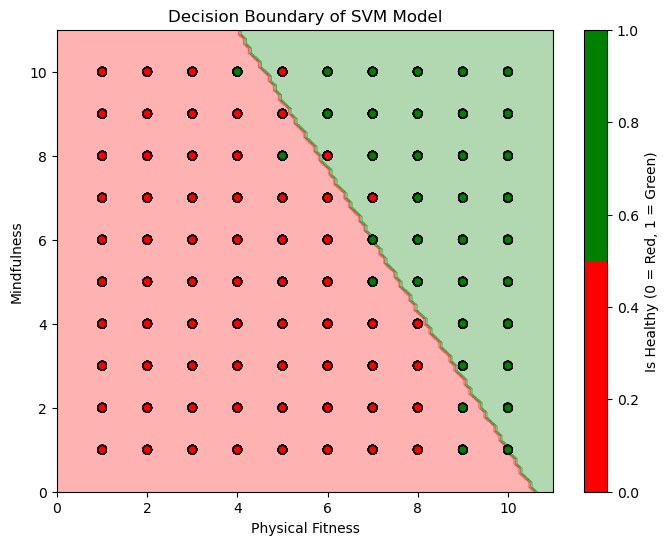

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Extracting Physical Fitness, Mindfullness against Is Healthy
X_vis = df[["phy_fitness", "mindfulness"]].values
y_vis = df["is_healthy"].values

# Train SVM on selected features
svm_vis_model = SVC(kernel="linear", random_state=42)
svm_vis_model.fit(X_vis, y_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict for mesh grid
Z = svm_vis_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["red", "green"]))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors="k", cmap=ListedColormap(["red", "green"]))
plt.xlabel("Physical Fitness")
plt.ylabel("Mindfulness")
plt.title("Decision Boundary of SVM Model")
plt.colorbar(label="Is Healthy (0 = Red, 1 = Green)")
plt.show()


## Final Scores of the model

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Generating confusion matrix
cm = confusion_matrix(y_test, svm_preds)

# Generate reprt
class_report = classification_report(y_test, svm_preds)

# Compute ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

print(cm)
print(class_report)
print(roc_auc)


[[791  12]
 [  2 395]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       803
           1       0.97      0.99      0.98       397

    accuracy                           0.99      1200
   macro avg       0.98      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200

0.999623577829989


This shows that 791 of the Unhealthy are properly classified

And shows that 395 of the Healthy are properly classified

And shows that 12 of the Unhealthy wrongly classified

And shows that 2 of the Unhealthy are wrongly classified

## Which translates to around 98.83% Accuracy :)

## Saving model

In [7]:
import joblib

model_path = "./health_prediction_svm_model.pkl"
joblib.dump(svm_model, model_path)

encoders_path = "./label_encoders.pkl"
joblib.dump(label_encoders, encoders_path)

print(model_path)
print(encoders_path)


./health_prediction_svm_model.pkl
./label_encoders.pkl


## Test the model, Fake data time

In [8]:
import joblib
import pandas as pd

# Loading model and encoder
model = joblib.load("health_prediction_svm_model.pkl")
label_encoders = joblib.load("label_encoders.pkl")

# Input fake data hehe
new_data = pd.DataFrame([{
    "phy_fitness": 6,
    "diet_pref": "Vegetarian",
    "act_level": "Active",
    "sleep_hrs": 7,
    "mindfulness": 8,
    "career": "Engineer",
    "gender": 1,
    "daily_avg_steps": 8000,
    "daily_avg_calories": 2200
}])

# Encode variables
for col in ["diet_pref", "act_level", "career"]:
    new_data[col] = label_encoders[col].transform(new_data[col])

# Make prediction
prediction = model.predict(new_data)
print("Predicted Health Status:", "Healthy" if prediction[0] == 1 else "Not Healthy")


Predicted Health Status: Not Healthy


Hence proved Vegeterian Engineers arent healthy :)